In [ ]:
!pip install spacy contractions emoji wordsegment sacremoses pyspellchecker contractions nltk transformers torch vaderSentiment nlpaug

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 553.2/553.2 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 6.1 MB/s eta 0:00:00


In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 20.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
import pandas as pd
import contractions
import emoji
import re
from spellchecker import SpellChecker
from wordsegment import load, segment

In [ ]:


# Load the SpaCy language model
nlp = spacy.load('en_core_web_sm')
df=pd.read_csv('Tweets.csv')

# Initialize spell checker and wordsegment
spell = SpellChecker()
load()

# Define a regex pattern to match words with backticks that are likely contractions
pattern = r"(\w+)\`"

# Define a function to replace backticks with single quotes in potential contractions
def fix_contractions(text):
  # Check if the text is a string before applying the regex
  if isinstance(text, str):
    return re.sub(pattern, r"\1'", text)
  else:
    return text # Return the original value if it's not a string

# Apply the fix_contractions function to the 'text' column
df['ctext'] = df['text'].apply(fix_contractions)

# # Apply contractions.fix to each text in the 'text' column
# expanded_text = df['text'].apply(lambda x: contractions.fix(x))
# df['text']=expanded_text
# print(expanded_text)
print(df['ctext'])

0                      I'd have responded, if I were going
1            Sooo SAD I will miss you here in San Diego!!!
2                                my boss is bullying me...
3                           what interview! leave me alone
4         Sons of ****, why couldn't they put them on t...
                               ...                        
27476     wish we could come see u on Denver  husband l...
27477     I've wondered about rake to.  The client has ...
27478     Yay good for both of you. Enjoy the break - y...
27479                           But it was worth it  ****.
27480       All this flirting going on - The ATG smiles...
Name: ctext, Length: 27481, dtype: object


In [ ]:
import spacy
import pandas as pd
import contractions
import emoji
import re
from spellchecker import SpellChecker
from wordsegment import load, segment

In [ ]:



# Unified preprocessing function
def preprocess_text(text):
    if isinstance(text, str):
        # Step 1: Expand contractions
        text = contractions.fix(text)

        # Define a regex pattern to match words with backticks that are likely contractions
       # Step 2: Check for repeated characters and remove data if found
       # New Step: Remove words with 3 or more repeated characters
        # Step 2: Handle repeated characters (reduce to two)
        # Step 2: Handle repeated characters (reduce to one if three or more repetitions)
        # Step 2: Handle repeated characters (reduce to one if three or more repetitions)
        # Step 2: Handle repeated characters (reduce to one if three or more repetitions)
        pattern = r'\b(\w*)(\w)\2{2,}(\w*)\b'
        text = re.sub(pattern, r'\1\2\3', text)

        # Step 2: Convert emojis to text
        text = emoji.demojize(text)

        # Step 3: Replace URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '<URL>', text, flags=re.MULTILINE)

        # Step 4: Replace user mentions
        text = re.sub(r'@\w+', '<USER>', text)


        # Step 5: Handle hashtags
        text = ' '.join([' '.join(segment(word[1:])) if word.startswith('#') else word for word in text.split()])

        # Step 6: Correct misspellings
        clean_text = ' '.join([spell.correction(word) if spell.correction(word) is not None else word for word in text.split()])

        # Step 7: Process using SpaCy
        doc = nlp(clean_text)
        tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]

        # Return both the cleaned text and the final processed text
        return clean_text, ' '.join(tokens)

    else:
        return '', ''

# Apply the unified preprocessing function and create two new columns
df['clean_text'], df['final_cleaned_text'] = zip(*df['ctext'].apply(preprocess_text))


df.to_csv('processed_data.csv', index=False)

In [ ]:
import pandas as pd
# Load the dataset
df = pd.read_csv('processed_data.csv')
# Show the first few rows of both cleaned and final cleaned text
print(df[['clean_text', 'final_cleaned_text']].head())


                                          clean_text  final_cleaned_text
0             I would have responded if I were going          respond go
1        So SAD I will miss you here in San Diego!!!  SAD miss San Diego
2                          my boss is bullying me...          boss bully
3                      what interview leave me alone     interview leave
4  Sons of ****, why could not they put them on t...     son release buy


In [ ]:


# Import necessary libraries
import pandas as pd
from transformers import MarianMTModel, MarianTokenizer
import torch
from accelerate import Accelerator

print(df)
# Define the back-translation function
def back_translate(text_list, src_lang='en', tgt_lang='fr', batch_size=8):
    # Initialize the accelerator
    accelerator = Accelerator()

    # Define the models and tokenizers for translation
    model_name = f"Helsinki-NLP/opus-mt-{src_lang}-{tgt_lang}"
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    back_model_name = f"Helsinki-NLP/opus-mt-{tgt_lang}-{src_lang}"
    back_tokenizer = MarianTokenizer.from_pretrained(back_model_name)
    back_model = MarianMTModel.from_pretrained(back_model_name)

    # Prepare the models and data for acceleration
    model, back_model, tokenizer, back_tokenizer = accelerator.prepare(
        model, back_model, tokenizer, back_tokenizer
    )

    model.eval()  # Set the model to evaluation mode to optimize performance
    back_model.eval()

    # Initialize lists to store the results
    back_translated_texts = []

    # Process in batches
    for i in range(0, len(text_list), batch_size):
        batch_texts = text_list[i:i + batch_size]

        # Convert any non-string values to strings
        batch_texts = [str(text) for text in batch_texts]

        # Tokenize input
        encoded = tokenizer(batch_texts, return_tensors="pt", padding=True, truncation=True)

        # Translate to target language
        with torch.no_grad():  # Disable gradient calculation to save memory
            translated = model.generate(**encoded)

        tgt_texts = [tokenizer.decode(t, skip_special_tokens=True) for t in translated]

        # Translate back to source language
        back_encoded = back_tokenizer(tgt_texts, return_tensors="pt", padding=True, truncation=True)
        with torch.no_grad():
            back_translated = back_model.generate(**back_encoded)

        back_tgt_texts = [back_tokenizer.decode(bt, skip_special_tokens=True) for bt in back_translated]
        back_translated_texts.extend(back_tgt_texts)

    return back_translated_texts





           textID                                               text  \
0      cb774db0d1                I`d have responded, if I were going   
1      549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2      088c60f138                          my boss is bullying me...   
3      9642c003ef                     what interview! leave me alone   
4      358bd9e861   Sons of ****, why couldn`t they put them on t...   
...           ...                                                ...   
27476  4eac33d1c0   wish we could come see u on Denver  husband l...   
27477  4f4c4fc327   I`ve wondered about rake to.  The client has ...   
27478  f67aae2310   Yay good for both of you. Enjoy the break - y...   
27479  ed167662a5                         But it was worth it  ****.   
27480  6f7127d9d7     All this flirting going on - The ATG smiles...   

                                           selected_text sentiment  \
0                    I`d have responded, if I were going   neutra

In [ ]:

# Calculate the total number of rows and the chunk size
total_rows = len(df)
chunk_size = total_rows // 4


In [ ]:

# **Processing Day 1 (First 25% of the data)**



# Define the starting and ending indices for the first 25%
start_idx = 0
end_idx = start_idx + chunk_size

# Extract the first chunk (first 25% of the data)
chunk = df.iloc[start_idx:end_idx]

# Back-translate the first chunk
back_translated_text = back_translate(chunk['clean_text'].tolist(), batch_size=8)

# Add the back-translated text to the chunk
chunk['back_translated_text'] = back_translated_text

# Save the processed chunk to Google Drive
chunk.to_csv('back_translated_data_complete_part_1.csv', index=False)
print('Part 1 (25%) processed and saved.')

# Download the file if you wish (optional step)
from google.colab import files
files.download('back_translated_data_complete_part_1.csv')



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

Part 1 (25%) processed and saved.


<ipython-input-8-0c42bcedeb70>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['back_translated_text'] = back_translated_text


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

\🛌🛌🛌🛌🛌

In [ ]:
start_idx = chunk_size
end_idx = start_idx + chunk_size

chunk = df.iloc[start_idx:end_idx]
back_translated_text = back_translate(chunk['clean_text'].tolist(), batch_size=8)
chunk['back_translated_text'] = back_translated_text

# Save the processed chunk to Google Drive
chunk.to_csv('back_translated_data_complete_part_2.csv', index=False)
print('Part 2 (25%) processed and saved.')

# Download the file if you wish (optional step)
from google.colab import files
files.download('back_translated_data_complete_part_2.csv')



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

Part 2 (25%) processed and saved.


<ipython-input-7-3c77441774da>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['back_translated_text'] = back_translated_text


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
start_idx = 2 * chunk_size
end_idx = start_idx + chunk_size

chunk = df.iloc[start_idx:end_idx]
back_translated_text = back_translate(chunk['clean_text'].tolist(), batch_size=8)
chunk['back_translated_text'] = back_translated_text
# Save the processed chunk to Google Drive
chunk.to_csv('back_translated_data_complete_part_3.csv', index=False)
print('Part 3 (25%) processed and saved.')

# Download the file if you wish (optional step)
from google.colab import files
files.download('back_translated_data_complete_part_3.csv')


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Part 3 (25%) processed and saved.


<ipython-input-8-25aed54846cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['back_translated_text'] = back_translated_text


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
start_idx = 3 * chunk_size
end_idx = start_idx + chunk_size

chunk = df.iloc[start_idx:end_idx]
back_translated_text = back_translate(chunk['clean_text'].tolist(), batch_size=8)
chunk['back_translated_text'] = back_translated_text
# Save the processed chunk to Google Drive
chunk.to_csv('back_translated_data_complete_part_4.csv', index=False)
print('Part 4 (25%) processed and saved.')

# Download the file if you wish (optional step)
from google.colab import files
files.download('back_translated_data_complete_part_4.csv')


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Part 4 (25%) processed and saved.


<ipython-input-9-e89a131b2685>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['back_translated_text'] = back_translated_text


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Load all the processed chunks
part1 = pd.read_csv('back_translated_data_complete_part_1.csv')
part2 = pd.read_csv('back_translated_data_complete_part_2.csv')
part3 = pd.read_csv('back_translated_data_complete_part_3.csv')
part4 = pd.read_csv('back_translated_data_complete_part_4.csv')

# Combine the chunks
back_combined_df = pd.concat([part1, part2, part3, part4], ignore_index=True)
# Assign only the 'back_translated_text' column from back_combined_df
df['back_translated_text'] = back_combined_df['back_translated_text']
# Save the combined dataset
df.to_csv('back_translated_data_complete.csv', index=False)
print('All parts combined and saved.')
# Download the file if you wish (optional step)
print(df)



All parts combined and saved.
           textID                                               text  \
0      cb774db0d1                I`d have responded, if I were going   
1      549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2      088c60f138                          my boss is bullying me...   
3      9642c003ef                     what interview! leave me alone   
4      358bd9e861   Sons of ****, why couldn`t they put them on t...   
...           ...                                                ...   
27476  4eac33d1c0   wish we could come see u on Denver  husband l...   
27477  4f4c4fc327   I`ve wondered about rake to.  The client has ...   
27478  f67aae2310   Yay good for both of you. Enjoy the break - y...   
27479  ed167662a5                         But it was worth it  ****.   
27480  6f7127d9d7     All this flirting going on - The ATG smiles...   

                                           selected_text sentiment  \
0                    I`d have respo

In [ ]:
import pandas as pd
df=pd.read_csv('back_translated_data_complete.csv')

In [ ]:
import pandas as pd
from transformers import pipeline
from tqdm import tqdm  # for progress bar
import random
# Load pre-trained model and tokenizer
unmasker = pipeline('fill-mask', model='bert-base-uncased')



# Define chunk size for processing
chunk_size = 1000

def replace_synonyms_sentiment_aware(text, num_replacements=1):
    """
    Replaces words in a text with synonyms using a BERT-based masked language model,
    while trying to preserve the original sentiment.

    Args:
        text: The input text string.
        num_replacements: The number of words to replace with synonyms (default is 1).

    Returns:
        The augmented text with replaced synonyms.
    """
    # Check if the input is a string
    if isinstance(text, str):
        words = text.split()
        replace_indices = random.sample(range(len(words)), num_replacements)

        for index in replace_indices:
            masked_text = words[:index] + ['[MASK]'] + words[index + 1:]
            predictions = unmasker(' '.join(masked_text))

            # Filter predictions based on sentiment (optional)
            # You'll need a sentiment lexicon or model to implement this
            # For now, we'll just take the top prediction
            replacement = predictions[0]['token_str']
            words[index] = replacement

        return ' '.join(words)
    else:
        # Handle non-string values (e.g., return as is or handle NaN)
        return text

# Process data in chunks
syn_texts = []
for i in tqdm(range(0, len(df), chunk_size)):
    chunk = df['clean_text'][i:i+chunk_size]
    augmented_chunk = chunk.apply(replace_synonyms_sentiment_aware)
    syn_texts.extend(augmented_chunk)

# Add augmented texts to the DataFrame
df['syn_replacement_texts'] = syn_texts

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
100%|██████████| 28/28 [1:05:35<00:00, 140.56s/it]


In [ ]:
df.to_csv('augmented_text_syn.csv', index=False)

In [ ]:
df=pd.read_csv('augmented_text_syn.csv')

In [ ]:
import random
import nltk
from nltk.corpus import opinion_lexicon
nltk.download('opinion_lexicon')

# Load sentiment lexicons
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

# Function to insert sentiment-aware words
def sentiment_aware_insertion(text, sentiment_label):
    # Check if text is a string
    if isinstance(text, str):
        # Tokenize the text into words
        words = text.split()

        # Insert sentiment-aware word based on the sentiment label
        if sentiment_label == 'positive':
            # Randomly select a positive word
            word_to_insert = random.choice(list(positive_words))
        elif sentiment_label == 'negative':
            # Randomly select a negative word
            word_to_insert = random.choice(list(negative_words))
        else:
            # No word insertion for neutral sentiment
            word_to_insert = None

        # Insert the word into the sentence if applicable
        if word_to_insert:
            # Randomly choose a position to insert the word
            insert_position = random.randint(0, len(words))
            words.insert(insert_position, word_to_insert)

        # Return the modified sentence
        return ' '.join(words)
    else:
        # Handle non-string values (e.g., return as is or handle NaN)
        return text

# Apply the function to the clean_text column using the sentiment column for sentiment-aware word insertion
df['ran_ins_text'] = df.apply(lambda row: sentiment_aware_insertion(row['clean_text'], row['sentiment']), axis=1)

# Display some examples of the modified text
df[['clean_text', 'ran_ins_text']].head()

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


,clean_text,ran_ins_text
0,I would have responded if I were going,I would have responded if I were going
1,So SAD I will miss you here in San Diego!!!,So SAD I will miss you here in San misleadingl...
2,my boss is bullying me...,my insouciance boss is bullying me...
3,what interview leave me alone,what interview leave me alone squeak
4,"Sons of ****, why could not they put them on t...","invidiousness Sons of ****, why could not they..."


In [ ]:
#random delteion of sentimnet words
import random
import nltk
from nltk.corpus import opinion_lexicon
nltk.download('opinion_lexicon')

# Load sentiment lexicons
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

# Function to randomly delete sentiment-aware words
def sentiment_aware_deletion(text, sentiment_label, p=0.5):
    # Check if text is a valid string
    if isinstance(text, str):
        words = text.split()

        if sentiment_label == 'positive':
            # Only delete positive words
            sentiment_words = [word for word in words if word in positive_words]
        elif sentiment_label == 'negative':
            # Only delete negative words
            sentiment_words = [word for word in words if word in negative_words]
        else:
            # For neutral sentiment, don't delete any sentiment words
            sentiment_words = []

        # Deletion based on probability 'p' from the sentiment words
        words_after_deletion = [word for word in words if word not in sentiment_words or random.uniform(0, 1) > p]

        # Ensure that at least one sentiment word remains if any exist
        if len(words_after_deletion) == 0 and len(sentiment_words) > 0:
            words_after_deletion.append(random.choice(sentiment_words))

        return ' '.join(words_after_deletion)
    else:
        # Handle non-string values by returning the original value
        return text

# Apply the function to the 'clean_text' column using the 'sentiment' column for sentiment-aware word deletion
df['ran_text_deletion'] = df.apply(lambda row: sentiment_aware_deletion(row['clean_text'], row['sentiment'], p=0.5), axis=1)

# Display some examples of the modified text after random deletion
df[['clean_text', 'ran_text_deletion']].head()

df.to_csv('augmented_text.csv', index=False)

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


In [ ]:
import ast
import pandas as pd
import nlpaug.augmenter.word as naw
import random
from nltk.corpus import wordnet
import nltk
print(df.columns)
# Download necessary NLTK data
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize augmenters
synonym_aug = naw.SynonymAug(aug_src='wordnet')
swap_aug = naw.RandomWordAug(action="swap")
delete_aug = naw.RandomWordAug(action="delete")

# Function for synonym replacement using WordNet
# def synonym_replacement(text, n=2):
#     words = text.split()
#     new_words = words.copy()
#     random.shuffle(words)
#     num_replaced = 0
#     for word in words:
#         synonyms = wordnet.synsets(word)
#         if synonyms:
#             synonym = synonyms[0].lemmas()[0].name()
#             new_words = [synonym if w == word and num_replaced < n else w for w in new_words]
#             num_replaced += 1
#         if num_replaced >= n:
#             break
#     return ' '.join(new_words)

# Text augmentation pipeline
# Text augmentation pipeline
def augment_text(text, num_augmentations=3):
    # Check if text is valid
    if isinstance(text, str) and len(text) > 0:
        augmented_texts = []

        for _ in range(num_augmentations):
            aug_choice = random.choice(['synonym', 'swap', 'delete'])

            if aug_choice == 'synonym':
                augmented_text = synonym_aug.augment(text)
            elif aug_choice == 'swap':
                augmented_text = swap_aug.augment(text)
            elif aug_choice == 'delete':
                augmented_text = delete_aug.augment(text)
            else:
                augmented_text = text

            augmented_texts.append(augmented_text)

        return augmented_texts
    else:
        return text # Return original text if not valid

# Apply augmentation to the 'cleaned_text' column
df['augmented_textsmul'] = df['clean_text'].apply(lambda x: augment_text(x, num_augmentations=3))
# Save the augmented dataset to a new CSV file
df.to_csv('augmented_Tweets.csv', index=False)

print("Text augmentation applied and saved to 'augmented_Tweets.csv'.")


Index(['textID', 'text', 'selected_text', 'sentiment', 'ctext', 'clean_text',
       'final_cleaned_text', 'back_translated_text', 'syn_replacement_texts',
       'ran_ins_text', 'ran_text_deletion', 'augmented_textsmul'],
      dtype='object')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Text augmentation applied and saved to 'augmented_Tweets.csv'.


In [ ]:
print(df.columns)
print(df)

Index(['textID', 'text', 'selected_text', 'sentiment', 'ctext', 'clean_text',
       'final_cleaned_text', 'back_translated_text', 'syn_replacement_texts',
       'ran_ins_text', 'ran_text_deletion', 'augmented_textsmul'],
      dtype='object')
           textID                                               text  \
0      cb774db0d1                I`d have responded, if I were going   
1      549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2      088c60f138                          my boss is bullying me...   
3      9642c003ef                     what interview! leave me alone   
4      358bd9e861   Sons of ****, why couldn`t they put them on t...   
...           ...                                                ...   
27476  4eac33d1c0   wish we could come see u on Denver  husband l...   
27477  4f4c4fc327   I`ve wondered about rake to.  The client has ...   
27478  f67aae2310   Yay good for both of you. Enjoy the break - y...   
27479  ed167662a5                  

In [ ]:
import ast
# Step 1: Create separate DataFrames for each text column
clean_textt_df = df[['clean_text', 'sentiment']].rename(columns={'clean_text': 'text'})
back_translated_text_df = df[['back_translated_text', 'sentiment']].rename(columns={'back_translated_text': 'text'})
syn_replacement_texts_df = df[['syn_replacement_texts', 'sentiment']].rename(columns={'syn_replacement_texts': 'text'})
ran_ins_text_df = df[['ran_ins_text', 'sentiment']].rename(columns={'ran_ins_text': 'text'})
ran_text_deletion_df = df[['ran_text_deletion', 'sentiment']].rename(columns={'ran_text_deletion': 'text'})

# Function to safely parse stringified lists with error handling
# Function to safely parse stringified lists with error handling
def safe_literal_eval(val):
    if isinstance(val, str):  # Check if the value is a string
        try:
            return ast.literal_eval(val)
        except (ValueError, SyntaxError):
            return []  # Return an empty list if parsing fails
    elif isinstance(val, float):  # Check if the value is a float (potential NaN)
        return []  # Return an empty list for float values (NaN)
    else:
        return val  # Return other values as is

# Flatten the 'augmented_texts' column and create a DataFrame for the augmented texts
augmented_textsmul_df = pd.DataFrame({
    'text': [item for sublist in df['augmented_textsmul'].apply(safe_literal_eval) for item in sublist if item],  # Flatten and filter out empty items
    'sentiment': df.loc[df.index.repeat(df['augmented_textsmul'].apply(lambda x: len(safe_literal_eval(x)))), 'sentiment'].values
})



# Combine original clean_text with the augmented texts
original_df = df[['final_cleaned_text', 'sentiment']].rename(columns={'final_cleaned_text': 'text'})

# Concatenate the original and augmented texts into one DataFrame
combined_df = pd.concat([original_df, augmented_textsmul_df, ran_text_deletion_df, ran_ins_text_df, syn_replacement_texts_df, back_translated_text_df, clean_textt_df], ignore_index=True)

# Reset the index to avoid issues with concatenation
combined_df.reset_index(drop=True, inplace=True)

# Save the combined DataFrame to a CSV file
combined_df.to_csv('combined_augmented_tweetsfinal.csv', index=False)
# print(combined_df.head())



In [2]:
import pandas as pd
combined_df=pd.read_csv('combined_augmented_tweetsfinal.csv')
print(combined_df)

                                                     text sentiment
0                                              respond go   neutral
1                                      SAD miss San Diego  negative
2                                              boss bully  negative
3                                         interview leave  negative
4                                         son release buy  negative
...                                                   ...       ...
247321  wish we could come see you on denser husband l...  negative
247322  I have wondered about rake to The client has m...  negative
247323  say good for both of you Enjoy the break - you...  positive
247324                          But it was worth it ****.  positive
247325  All this flirting going on - The at smiles say...   neutral

[247326 rows x 2 columns]


In [3]:

duplicates = combined_df[combined_df.duplicated(subset=['text'], keep=False)]

# Count the number of duplicates
num_duplicates = duplicates.shape[0]

# Display the count of duplicate rows
print(f"Number of duplicate rows based on 'text' column: {num_duplicates}")

# If you want to see the duplicated rows:
print(duplicates)

Number of duplicate rows based on 'text' column: 68289
                                                     text sentiment
0                                              respond go   neutral
8                                                     NaN   neutral
26                                                  sorry  negative
42                                                 mayday   neutral
61                                                hah yes   neutral
...                                                   ...       ...
247321  wish we could come see you on denser husband l...  negative
247322  I have wondered about rake to The client has m...  negative
247323  say good for both of you Enjoy the break - you...  positive
247324                          But it was worth it ****.  positive
247325  All this flirting going on - The at smiles say...   neutral

[68289 rows x 2 columns]


In [4]:

# Calculate text lengths
combined_df['text_length'] = combined_df['text'].str.len()

# Get the range of text lengths
min_length = combined_df['text_length'].min()
max_length = combined_df['text_length'].max()

print(f"Minimum text length: {min_length}")
print(f"Maximum text length: {max_length}")



Minimum text length: 1.0
Maximum text length: 2039.0


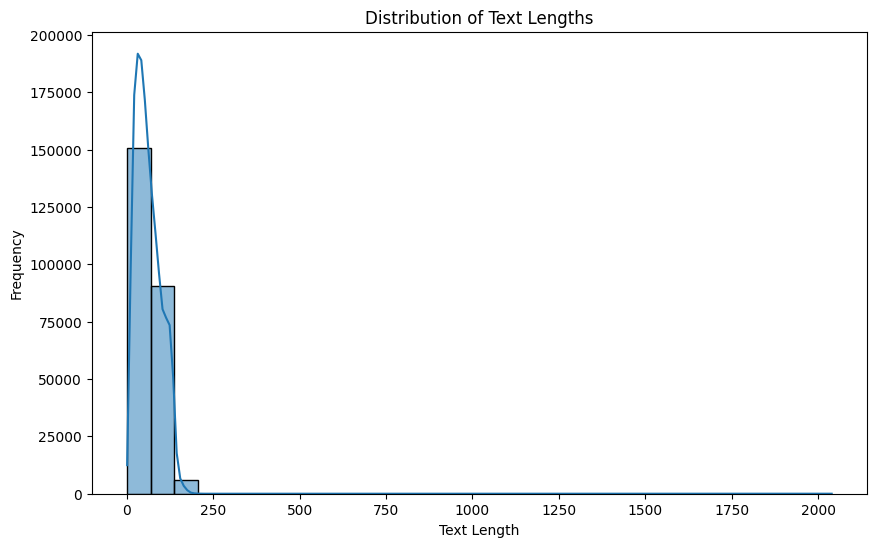

In [5]:

import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['text_length'], bins=30, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


In [9]:

# Count the number of rows with text length equal to 0
zero_length_count = combined_df[combined_df['text_length'] == 0].shape[0]

# Count the number of rows with text length greater than 200
greater_than_200_length_count = combined_df[combined_df['text_length'] > 200].shape[0]

print(f"Number of rows with text length equal to 0: {zero_length_count}")
print(f"Number of rows with text length greater than 200: {greater_than_200_length_count}")


Number of rows with text length equal to 0: 0
Number of rows with text length greater than 200: 46


In [11]:

# Remove rows with text length equal to 0 or greater than 200
combined_df = combined_df[(combined_df['text_length'] > 0) & (combined_df['text_length'] <= 200)]

# Reset the index after removing rows
combined_df.reset_index(drop=True, inplace=True)

# Save the updated dataset
combined_df.to_csv('preprocessed_combined_clean_datasetfinal.csv', index=False)

print("Rows with text length 0 or greater than 200 removed and saved to 'preprocessed_combined_clean_datasetfinal.csv'")


Rows with text length 0 or greater than 200 removed and saved to 'preprocessed_combined_clean_datasetfinal.csv'


In [12]:

# Count the number of rows with text length equal to 0
zero_length_count = combined_df[combined_df['text_length'] == 0].shape[0]

# Count the number of rows with text length greater than 200
greater_than_200_length_count = combined_df[combined_df['text_length'] > 200].shape[0]

print(f"Number of rows with text length equal to 0: {zero_length_count}")
print(f"Number of rows with text length greater than 200: {greater_than_200_length_count}")


Number of rows with text length equal to 0: 0
Number of rows with text length greater than 200: 0


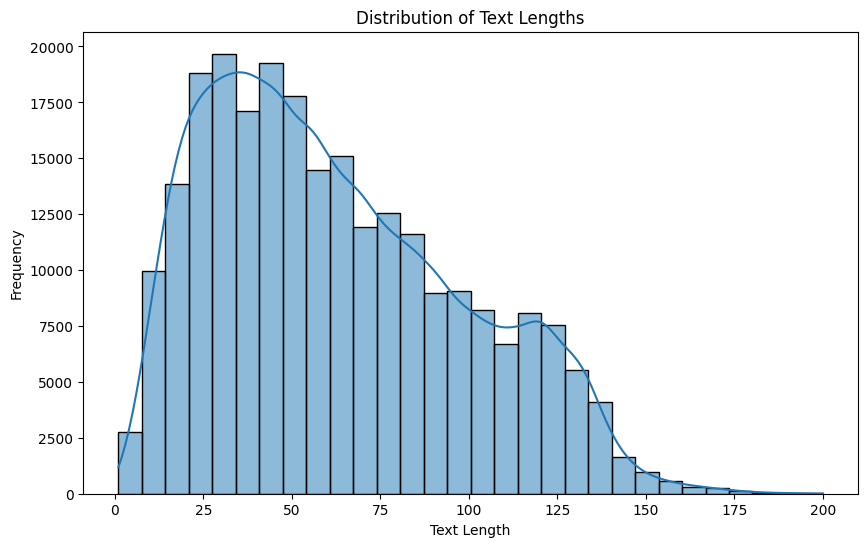

In [13]:

import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['text_length'], bins=30, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()
